# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# X_train, y_train = train['features'], train['labels']
# X_valid, y_valid = valid['features'], valid['labels']
# X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of validation examples
n_valid = len(valid['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
sample = train['features'][0]
image_shape = (len(sample[0]), len(sample[1]))

# TODO: How many unique classes/labels there are in the dataset.
unique_labels = set(train['labels'])
print('Unique Labels:', unique_labels)
n_classes = len(unique_labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Unique Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

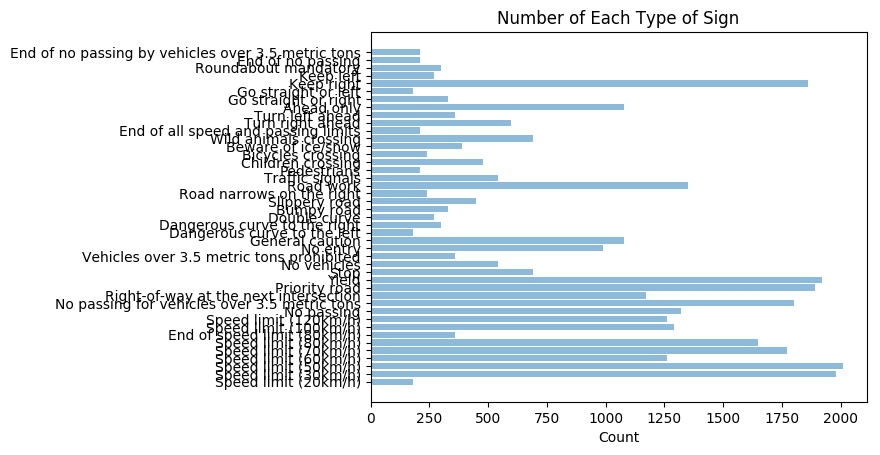

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcdefaults()

# Get the mapping of label number to english description from the csv
label_map = {}
with open('./signnames.csv', newline='') as file:
    reader = csv.reader(file)
    for row in list(reader)[1:]:  # Skip the first line, as it's just a key line
        label_map[row[0]] = row[1]
 
objects = [label_map[str(label)] for label in unique_labels]
y_pos = np.arange(len(objects))
x_count = [len([x for x in train['labels'] if x == label]) for label in unique_labels]  # Value for each label here
assert(len(x_count) == len(objects))
assert(sum(x_count) == len(train['features']))
 
plt.barh(y_pos, x_count, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.title('Number of Each Type of Sign')
 
plt.show()

Looks like for the less-common signs there are many less examples. I wonder if these will end up being harder to classify.

Let's print one of the image's pixel data so we see what we are dealing with and how we might normalize the data.

(7, 189)


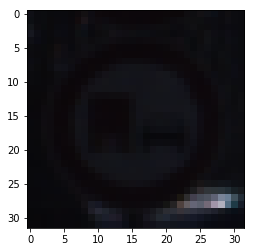

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Print an image and its pixel data
image = random.choice(train['features'])
plt.imshow(image)

a = np.array(image)
print((np.amin(a), np.amax(a)))

Looks like we are dealing with 0-255 pixel values. We can normalize these appropriately below.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about **0.89**. To meet specifications, the validation set accuracy will need to be at least **0.93**, the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Road work - 25
(0.16470588235294117, 1.0)


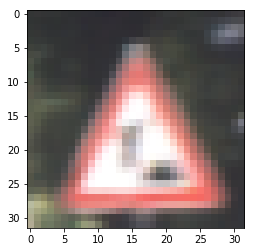

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

n_channels = 3
train_features, train_labels = np.array(train['features']), np.array(train['labels'])
valid_features, valid_labels = np.array(valid['features']), np.array(valid['labels'])
test_features, test_labels = np.array(test['features']), np.array(test['labels'])

# Grayscale these images
# train_features = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in train['features']])
# train_labels = np.array(train['labels'])
# valid_features = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in valid['features']])
# valid_labels = np.array(valid['labels'])
# test_features = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in test['features']])
# test_labels = np.array(test['labels'])

# # Grayscaling reduces dimensions from (32, 32, 3) to (32, 32)
# # Let's add back that extra dimension
# train_features = train_features[:,:,:,np.newaxis]
# valid_features = valid_features[:,:,:,np.newaxis]
# test_features = test_features[:,:,:,np.newaxis]

# Shuffle
train_features, train_labels = shuffle(train_features, train_labels)
valid_features, valid_labels = shuffle(valid_features, valid_labels)
test_features, test_labels = shuffle(test_features, test_labels)

if n_channels == 1: plt.imshow(np.squeeze(train_features[0]), cmap='gray')
else: plt.imshow(train_features[0])
print(label_map[str(train_labels[0])], '- {}'.format(train_labels[0]))

# Normalize pixel values to [0, 1]
train_features = train_features / 255
valid_features = valid_features / 255
test_features = test_features / 255

print((np.amin(train_features[0]), np.amax(train_features[0])))

### Model Architecture

In [7]:
# Helper functions

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def inception2d(x, in_channels, filter_count):
    # bias dimension = 3*filter_count and then the extra in_channels for the avg pooling
    bias = tf.Variable(tf.truncated_normal([3*filter_count + in_channels], mu, sigma))
    
    # 1x1
    one_filter = tf.Variable(tf.truncated_normal([1, 1, in_channels, filter_count], mu, sigma))
    one_by_one = tf.nn.conv2d(x, one_filter, strides=[1, 1, 1, 1], padding='SAME')

    # 3x3
    three_filter = tf.Variable(tf.truncated_normal([3, 3, in_channels, filter_count], mu, sigma))
    three_by_three = tf.nn.conv2d(x, three_filter, strides=[1, 1, 1, 1], padding='SAME')

    # 5x5
    five_filter = tf.Variable(tf.truncated_normal([5, 5, in_channels, filter_count], mu, sigma))
    five_by_five = tf.nn.conv2d(x, five_filter, strides=[1, 1, 1, 1], padding='SAME')

    # avg pooling
    pooling = tf.nn.avg_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
                             
    x = tf.concat([one_by_one, three_by_three, five_by_five, pooling], axis=3)  # Concat in the 4th dim to stack
    x = tf.nn.bias_add(x, bias)
    return tf.nn.relu(x)

In [8]:
### Define your architecture here -> LeNet with 3 convs

weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, n_channels, 6*n_channels], mu, sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6*n_channels, 16*n_channels], mu, sigma)),
    'wc3': tf.Variable(tf.truncated_normal([4, 4, 16*n_channels, 32*n_channels], mu, sigma)),
    'wf1': tf.Variable(tf.truncated_normal([4*4*32*n_channels, 120*n_channels], mu, sigma)),
    'wf2': tf.Variable(tf.truncated_normal([120*n_channels, 84*n_channels], mu, sigma)),
    'out': tf.Variable(tf.truncated_normal([84*n_channels, n_classes], mu, sigma)),
}
biases = {
    'bc1': tf.Variable(tf.truncated_normal([6*n_channels], mu, sigma)),
    'bc2': tf.Variable(tf.truncated_normal([16*n_channels], mu, sigma)),
    'bc3': tf.Variable(tf.truncated_normal([32*n_channels], mu, sigma)),
    'bf1': tf.Variable(tf.truncated_normal([120*n_channels], mu, sigma)),
    'bf2': tf.Variable(tf.truncated_normal([84*n_channels], mu, sigma)),
    'out': tf.Variable(tf.truncated_normal([n_classes], mu, sigma)),
}

def myLeNet(x):    
    # Convolution with Activation 32x32x(chan) -> 28x28x(6*chan)
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])

    # Convolution with Activation 28x28x(6*chan) -> 24x24x(16*chan)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Pooling 24x24x(16*chan) -> 12x12x(16*chan)
    conv2 = maxpool2d(conv2)
    
    # Convolution with Activation 12x12x(16*chan) -> 8x8x(32*chan)
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Pooling 8x8x(32*chan) -> 4x4x(32*chan)
    conv3 = maxpool2d(conv3)
    
    # Flatten
    flat = flatten(conv3)
    
    # Fully-Connected with Activation
    fc1 = tf.add(tf.matmul(flat, weights['wf1']), biases['bf1'])
    fc1 = tf.nn.relu(fc1)

    # Fully-Connected with Activation
    fc2 = tf.add(tf.matmul(fc1, weights['wf2']), biases['bf2'])
    fc2 = tf.nn.relu(fc2)

    # Fully-Connected
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Train your model here. Calculate and report the accuracy on the training and validation set. Once a final model architecture is selected, the accuracy on the test set should be calculated and reported as well. Feel free to use as many code cells as needed.

### Pipeline

In [9]:
input_images = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
input_labels = tf.placeholder(tf.int32, (None))
one_hot = tf.one_hot(input_labels, n_classes)

learning_rate = 0.001

logits = myLeNet(input_images)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot)
loss_op = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss_op)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(img_data, label_data):
    n_examples = len(img_data)
    total_accuracy = 0
    sess = tf.get_default_session()  # This function will be called from within a session, so we can grab it
    for offset in range(0, n_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        img_batch, label_batch = img_data[offset:end], label_data[offset:end]
        accuracy = sess.run(accuracy_op, feed_dict={input_images: img_batch, input_labels: label_batch})
        total_accuracy += accuracy * len(img_batch)
    return total_accuracy / n_examples

### Train the Model (and Validate)

In [10]:
EPOCHS = 10
BATCH_SIZE = 128

In [ ]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    n_examples = len(train_features)
    
    print('Training...')
    print()
    best_accuracy = 0
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, n_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            img_batch, label_batch = train_features[offset:end], train_labels[offset:end]
            sess.run(training_op, feed_dict={input_images: img_batch, input_labels: label_batch})
        
        validation_accuracy = evaluate(valid_features, valid_labels)
        print('EPOCH {} ...'.format(i+1))
        print('Validation accuracy = {:.3f}'.format(validation_accuracy))
        print()
        
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            path = saver.save(sess, './myLeNetSave.ckpt')
            print('Model saved to', path)
            print()
    

###  Test the Model

In [11]:
import tensorflow as tf

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './myLeNetSave.ckpt')

    test_accuracy = evaluate(test_features, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.949


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [12]:
### Load the images and plot them here.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle


new_signs = np.array([
    mpimg.imread('{}/30 speed.png'.format('./Downloaded_Signs')),
    mpimg.imread('{}/100 speed.png'.format('./Downloaded_Signs')),
    mpimg.imread('{}/yield.png'.format('./Downloaded_Signs')),
    mpimg.imread('{}/road work.png'.format('./Downloaded_Signs')),
    mpimg.imread('{}/straight or right.png'.format('./Downloaded_Signs'))
])
new_sign_labels = np.array([
    1,
    7,
    13,
    25,
    36
])

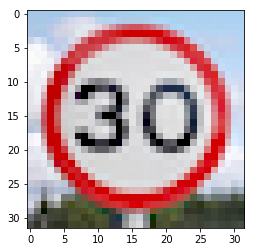

In [13]:
plt.imshow(new_signs[0])

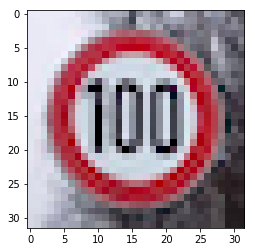

In [14]:
plt.imshow(new_signs[1])

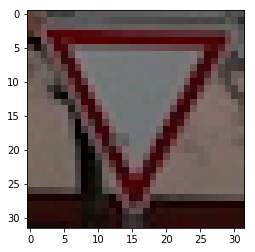

In [15]:
plt.imshow(new_signs[2])

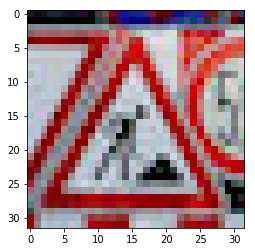

In [16]:
plt.imshow(new_signs[3])

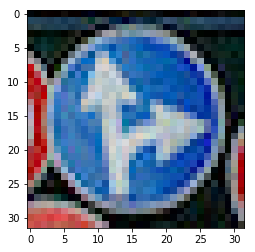

In [17]:
plt.imshow(new_signs[4])

### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

one_hot = tf.one_hot(new_sign_labels, n_classes)
softmax = tf.nn.softmax(logits)
top_predictions = tf.nn.top_k(softmax, k=5)

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './myLeNetSave.ckpt')
    predictions = sess.run(top_predictions, feed_dict={input_images: new_signs})

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print('Top 5 Softmax:')
print(predictions.values)
print('Labels:')
print(predictions.indices[:, 0])

sign_types = [label_map[str(num)] for num in predictions.indices[:, 0]]
print('Sign Names:')
print(sign_types)

correct_predictions = tf.equal(new_sign_labels, predictions.indices[:, 0])
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
with tf.Session() as sess:
    out_accuracy = sess.run(accuracy)

print('Overall Accuracy:')
print(out_accuracy)

Top 5 Softmax:
[[0.766 0.209 0.025 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000]
 [0.680 0.307 0.009 0.004 0.000]]
Labels:
[ 1  7 13 25 38]
Sign Names:
['Speed limit (30km/h)', 'Speed limit (100km/h)', 'Yield', 'Road work', 'Keep right']
Overall Accuracy:
0.8


### Results

We got an overall accuracy of **80%** for our downloaded signs. Our model was nearly certain for the 'speed limit 100', 'yield', and 'road work' signs, but it was less certain on the other two with softmax probabilities of 77% and 68%.

The 77% guess for the '30 speed limit' turned out to be correct, while the 68% guess for the 'straight or right' sign was wrong (pictured below). The model DID guess 'keep right', so I suppose that's similar at least.

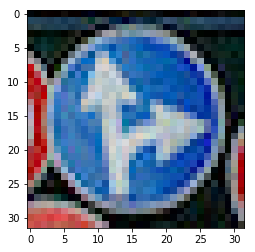

In [20]:
plt.imshow(new_signs[4])

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 